length: 6
['#c60d77', '#00a2e8', '#22b14c', '#fff200', '#b97a57', '#000000']


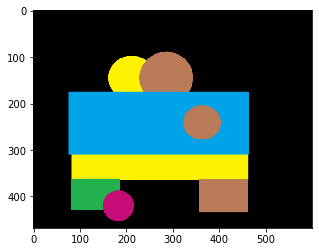

Image mode:  RGB


In [2]:
import cv2
import numpy as np
from PIL import Image,ImageDraw,ImageColor,ImageFont
import matplotlib.pyplot as plt
import matplotlib
import webcolors
import os
#################### Global variables ##########################

file_name='resizedexample'
file_name2="example"
####################################################
def show_image(img):
    plt.imshow(img, interpolation='nearest')
    plt.show()
    img = Image.fromarray(img)
    print("Image mode: ",img.mode)
####################################################

def getHexColorPalette(file_path):
    img=Image.open(file_path)
    colors = img.convert('RGB').getcolors()
    colorlist=[]

    for i in range(len(colors)):
        colorlist.append(webcolors.rgb_to_hex(colors[i][1]))
        
    print("length:",len(colorlist))
    return colorlist

def getRGBColorPalette(file_path):
    img=Image.open(file_path)
    colors = img.convert('RGB').getcolors()
    colorlist=[]

    for i in range(len(colors)):
        colorlist.append(colors[i][1])
        
    print("length:",len(colorlist))
    return colorlist
####################################################
file_path ='resized/'+file_name+'.png'
file_path2='sampleImages/'+file_name2+'.png'
cv_img = cv2.imread(file_path)

####################################################
topclr_list=getHexColorPalette(file_path2)
print(topclr_list)
show_image(cv_img)

In [3]:
def getLowRGB(colorList):
    rgb_palette=colorList
    low_rgb=[]
    for i in rgb_palette:
        rgb1=i
        val=[]
        for i in range(len(rgb1)):
            if(rgb1[i]!=0):
                val.append(abs(rgb1[i] - 1))
            else:
                val.append(rgb1[i])
        rgb2=(val[0],val[1],val[2])
        np_rgb = np.asarray(rgb2)
        low_rgb.append(np_rgb)
    return low_rgb
    
def getHighRGB(colorList):
    rgb_palette=colorList
    high_rgb=[]
    for i in rgb_palette:
        rgb1=i
        val=[]
        for i in range(len(rgb1)):
            rgb2=(rgb1[0],rgb1[1],rgb1[2])
        np_rgb = np.asarray(rgb2)
        high_rgb.append(np_rgb)
    return high_rgb

length: 6
[198  13 119]


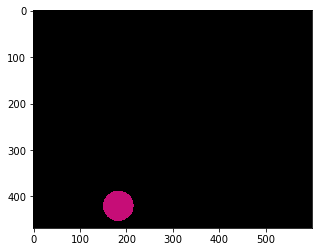

[  0 162 232]


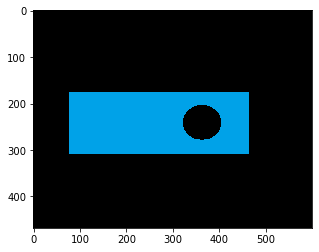

[ 34 177  76]


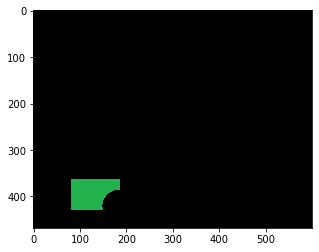

[255 242   0]


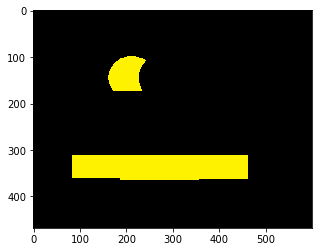

[185 122  87]


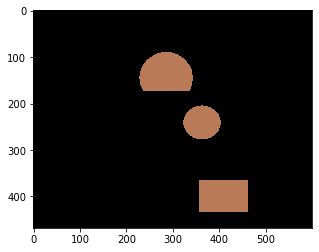

[0 0 0]


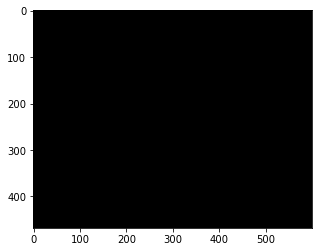

[[array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]], dtype=uint8),
  array([198,  13, 119])],
 [array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          .

In [6]:
def GetMaskSegment(rgb_image,colorList):
    low=getLowRGB(colorList)
    high=getHighRGB(colorList)
    
    imglists=[]
    
    for i in range(len(low)):
        mask = cv2.inRange(rgb_image, low[i], high[i])
        res = cv2.bitwise_and(rgb_image,rgb_image, mask= mask)
        imglists.append([res,high[i]])
        
    return imglists

def show_imglist(img_list):
    for i in range(len(img_list)):
        print(img_list[i][1])
        plt.imshow(img_list[i][0], interpolation='nearest')
        plt.show()

def FirstMaskSegmentation():
    rgb_colorList=getRGBColorPalette(file_path2)
    img_list=GetMaskSegment(cv_img,rgb_colorList)
    show_imglist(img_list)
    return img_list

FirstMaskSegmentation()

length: 6
[198  13 119]


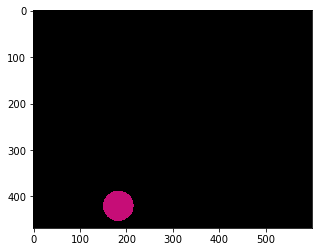

[  0 162 232]


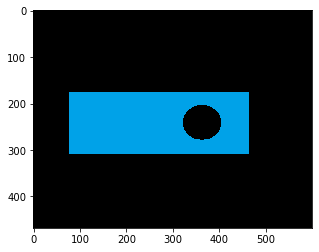

[ 34 177  76]


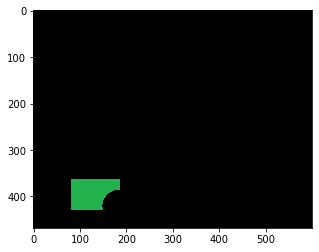

[255 242   0]


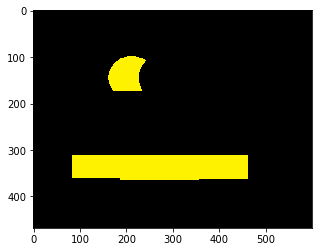

[185 122  87]


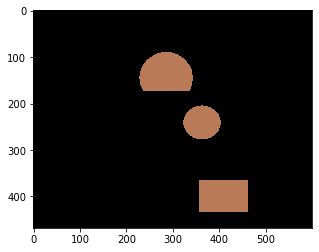

[0 0 0]


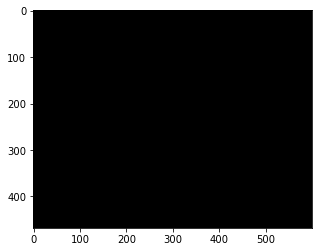

[198  13 119]


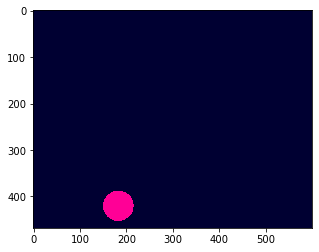

[  0 162 232]


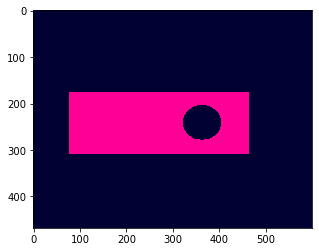

[ 34 177  76]


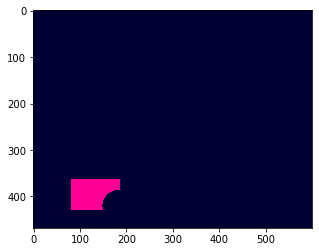

[255 242   0]


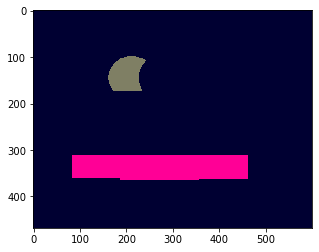

[185 122  87]


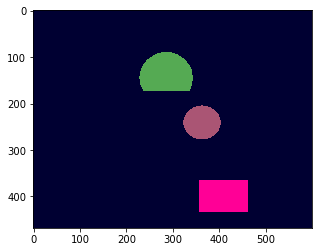

[0 0 0]


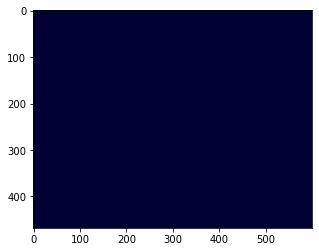

In [7]:
def apply_lut(src, lut):
    dst = lut[src]
    return dst

def ComponentLabeling(img):
    _, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    n_components, component_ids = cv2.connectedComponents(mask)

    # Initialize look up tables with arbitrary data for demonstration
    LUT1 = np.linspace(0, 255, n_components).astype(np.uint16)
    LUT2 = np.linspace(255, 0, n_components).astype(np.uint16)
    LUT3 = np.linspace(50, 150, n_components).astype(np.uint16)
    LUT2[0] = 0
    
    r = apply_lut(component_ids, LUT1)
    g = apply_lut(component_ids, LUT2)
    b = apply_lut(component_ids, LUT3)

    rgb = np.dstack((r, g, b)).astype(np.uint8)
    
    return rgb

def RGBtoGrayImage(rgbimg):
    grayImage = cv2.cvtColor(rgbimg, cv2.COLOR_RGB2GRAY)
    (thresh, im_bw) = cv2.threshold(grayImage, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return im_bw

def GetLabel_imglist(img_list):
    label_imglist=[]
    for i in range(len(img_list)):
        gray_im=RGBtoGrayImage(img_list[i][0])
        label_img=ComponentLabeling(gray_im)
        label_imglist.append([label_img,img_list[i][1]])
    return label_imglist

img_list=FirstMaskSegmentation()
show_imglist(GetLabel_imglist(img_list))

In [8]:
def GetAllPixValues(img):
    print("Getting all pixel list...")
    rows,cols,_ = img.shape
    pixlist=[]
    for i in range(rows):
        for j in range(cols):
            pixlist.append(webcolors.rgb_to_hex(img[i,j]))
    print("length:",len(pixlist))
    return pixlist


def getUniqueListValue(Inputlist):
    print("Getting unique values of the list...")
    unique_list = []
    for x in Inputlist:
        if x not in unique_list:
            unique_list.append(x)
    
    print("length:",len(unique_list))
    return unique_list

def SeeOccurrences(test_list):
    print("Getting occurred list...")
    res = []
    count = 1
    for ele in range(0, len(test_list) -1):
        if test_list[ele] != test_list[ele + 1]:
            res.append((test_list[ele],count))
            count = 1
        else :
            count = count + 1
    res.append((test_list[len(test_list) -1], count))
    
    print("length:",len(res))
    return res

def RemoveSpecificValue(input_list,val):
    new_list=[]
    for i in input_list:
        if(i!=val):
            new_list.append(i)
    return new_list

def GetBgPixVal(img):
    (r,g,b) = img[0, 0]
    a='#%02x%02x%02x' % (r,g,b)
    return a

length: 6
[198  13 119]


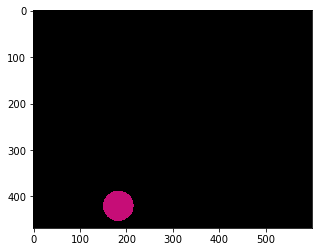

[  0 162 232]


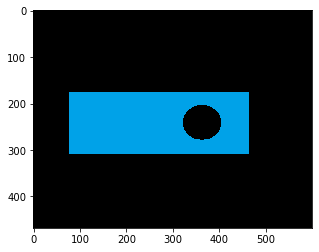

[ 34 177  76]


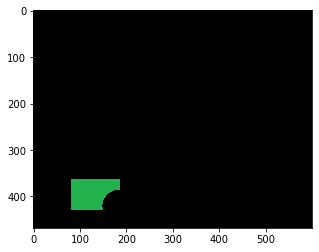

[255 242   0]


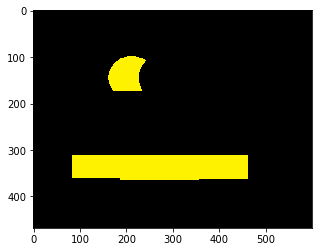

[185 122  87]


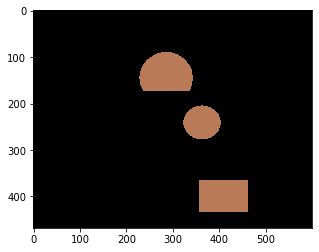

[0 0 0]


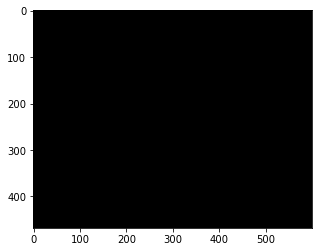

Getting all pixel list...
length: 280800
Getting unique values of the list...
length: 1
converting hexlist to rgblist...
Getting all pixel list...
length: 280800
Getting unique values of the list...
length: 1
converting hexlist to rgblist...
Getting all pixel list...
length: 280800
Getting unique values of the list...
length: 1
converting hexlist to rgblist...
Getting all pixel list...
length: 280800
Getting unique values of the list...
length: 2
converting hexlist to rgblist...
Getting all pixel list...
length: 280800
Getting unique values of the list...
length: 3
converting hexlist to rgblist...
Getting all pixel list...
length: 280800
Getting unique values of the list...
length: 0
converting hexlist to rgblist...
[198  13 119]


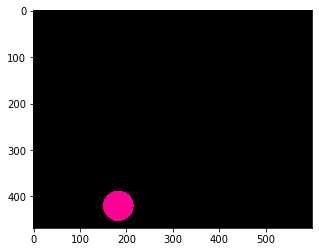

[  0 162 232]


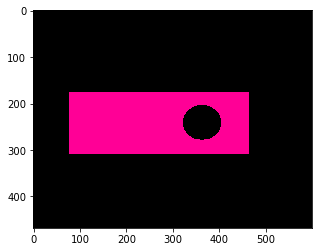

[ 34 177  76]


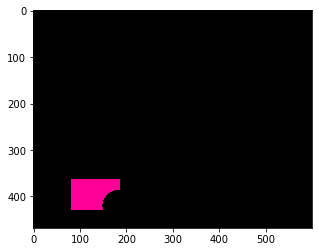

[255 242   0]


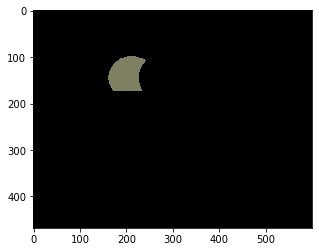

[255 242   0]


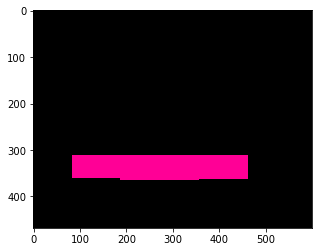

[185 122  87]


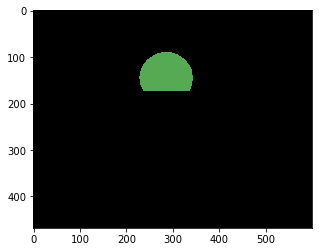

[185 122  87]


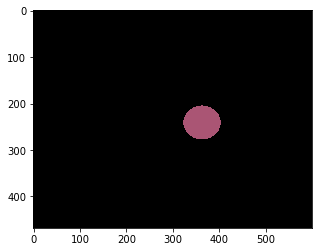

[185 122  87]


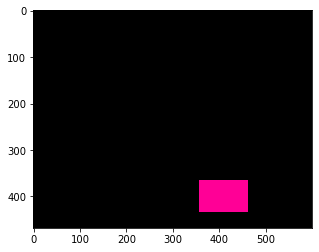

In [10]:
def hexTOrgb(input_list):
    print("converting hexlist to rgblist...")
    rgb_list=[]
    for i in input_list:
        rgb_list.append(ImageColor.getcolor(i, "RGB"))
    return rgb_list

def getColorPalette(img): 
    label_pix=GetAllPixValues(img)
    BgPix=GetBgPixVal(img)
    label_pix=RemoveSpecificValue(label_pix,BgPix) 
    unq_label_pix=getUniqueListValue(label_pix)
    
    return unq_label_pix

def GetSecondMaskSegment(rgb_image,colorList):
    low=getLowRGB(colorList)
    high=getHighRGB(colorList)
    
    imglists=[]
    
    for i in range(len(low)):
        mask = cv2.inRange(rgb_image, low[i], high[i])
        res = cv2.bitwise_and(rgb_image,rgb_image, mask= mask)
        imglists.append(res)
        
    return imglists

def SecondMaskSegmentation():
    img_list2=[]
    img_list=FirstMaskSegmentation()
    label_imglist=GetLabel_imglist(img_list)
    for i in range(len(label_imglist)):
        img=label_imglist[i][0]
        colorname=label_imglist[i][1]
        colorlist=getColorPalette(img)
        colorlist=hexTOrgb(colorlist)
        sec_imglist=GetSecondMaskSegment(img,colorlist)
        for j in sec_imglist:
            img_list2.append([j,colorname])
    return img_list2
        
show_imglist(SecondMaskSegmentation())